<a href="https://colab.research.google.com/github/senchiao/HRRR_plots/blob/main/1d_adv_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy
import sympy
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
import datetime
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [ ]:
from sympy import init_printing
init_printing()

In [ ]:
x, t = sympy.symbols('x t')

* Define parameters
* nx: number of grids
* nt: simulation time steps
* L : wavelength in terms of dx
* C : CFL number
* dx : spatial interval
* dt : temporal interval , i.e. time step

In [ ]:
nx = 50
nt = 301
dx = 1
U = .25    # advection speed
dt = 0.15
L = 24
C = U/(dx/dt)
#t = 0

* define the array

In [ ]:
u = numpy.zeros((nt,nx), dtype='f8')
u

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [ ]:
x = numpy.arange(nx,dtype='f8')*dx
x

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.])

* Initialize U at time =0

In [ ]:
u[0,:] = numpy.sin((2*numpy.pi*x)/(L*dx))
u

array([[  0.00000000e+00,   2.58819045e-01,   5.00000000e-01, ...,
         -2.58819045e-01,  -4.89858720e-16,   2.58819045e-01],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

In [ ]:
t0 = datetime.datetime.now()

* u[n+1, i] = u[n, i] + 0.5C(u[n, i+1] - u[n, i-1])
* Special care is needed for the boundaries i=0 or i=NX-1

In [ ]:
for n in range(nt-1):   # 0 - (NT-2)
#   print "processing for time step: ", n+1
   for i in range(nx):  # 0 - (NX-1)
      i_l = i-1   # right neighbor
      i_r = i+1   # left neighbor
      if i == 0:
         i_l += nx   # right boundary
      elif i == (nx-1):
         i_r -= nx   # lower boundary
      #fi
      u[n+1, i] = u[n, i] + 0.5*C*(u[n, i_r] - u[n, i_l])
   # end_for: i
# end_for: n

In [ ]:
u[25,:]

array([ 0.06448117,  0.52865999,  0.68741767,  0.85802243,  0.96186195,
        1.00099804,  0.97185165,  0.87647928,  0.7213761 ,  0.51711233,
        0.27760821,  0.01918556, -0.24054457, -0.48388197, -0.69424363,
       -0.85729372, -0.96192067, -1.00099431, -0.97185184, -0.87647928,
       -0.7213761 , -0.51711233, -0.27760821, -0.01918556,  0.24054457,
        0.48388197,  0.69424363,  0.85729372,  0.96192067,  1.00099431,
        0.97185184,  0.87647928,  0.7213761 ,  0.51711233,  0.27760821,
        0.01918556, -0.24054457, -0.48388197, -0.69424363, -0.85729372,
       -0.96192067, -1.00099431, -0.97185185, -0.87647948, -0.72138006,
       -0.51717607, -0.27842395, -0.02718888,  0.18376796,  0.22137584])

* show results
* print the CFL number

0:09:50.299420
Simulation ends!


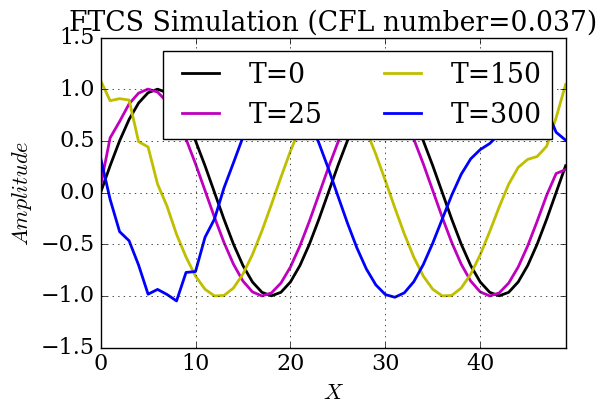

In [ ]:
l1, = pyplot.plot(x, u[0, :], '-k', linewidth=2)
l2, = pyplot.plot(x, u[25, :], '-m', linewidth=2)
l3, = pyplot.plot(x, u[150, :], '-y', linewidth=2)
l4, = pyplot.plot(x, u[300, :],  '-b', linewidth=2)

pyplot.legend((l1,l2,l3,l4), ("T=0", "T=25", "T=150", "T=300"), ncol=2, loc='best')
pyplot.xlabel('$X$');
pyplot.ylabel('$Amplitude$')
pyplot.grid(True)
pyplot.xlim([0, nx-1])
pyplot.ylim([-1.5, 1.5])
pyplot.title("FTCS Simulation (CFL number=%.3f)" % (C))
print (datetime.datetime.now()-t0)
print ("Simulation ends!")

In [ ]:
#pyplot.figure(figsize=(8,5), dpi=100)
#pyplot.plot(x,u, color='#003366', ls='--', lw=3)
#pyplot.xlim([0,1])
#pyplot.ylim([-1,1]);